In [2]:
from os import path
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from lxml import etree
import spacy
from glob import glob
from unicodedata import normalize

In [3]:
%matplotlib inline

In [7]:
nlp = spacy.load('fr_core_news_lg')

In [18]:
def est_canon(tree):
    if tree.find(".//profileDesc") is not None:
        profil = tree.find(".//profileDesc")
        if profil.get("tag") == "canon":
            print("canon")
            return True
        else:
            print("non canon")
            return False

In [28]:
def lemme_freq(path):
    tag = False
    lemmes_freq = Counter()
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    clean_text = normalize("NFKD", paragraphe.text)
                    docs = nlp(clean_text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and "SPACE" and "X" and "SYM":
                            lemmes_freq[token.lemma_] += 1          
    print("Nombre de lemmes unique dans le texte : ", len(lemmes_freq.values()))
    print("Nombre de lemmes total dans le texte : ", sum(lemmes_freq.values()))
    return tag, len(lemmes_freq), sum(lemmes_freq.values())

In [19]:
canon = False
annee_canon = []
annee_archive = []
type_token_canon = []
type_token_archive = []
for doc in glob('corpus_master/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    date = doc_name.split("_")[0]
    print(doc_name)
    canon, lemmes_unique, lemmes_totaux = lemme_freq(doc)
    moyenne_lemme = lemmes_unique/lemmes_totaux
    if canon:
        type_token_canon.append(moyenne_lemme)
        annee_canon.append(date)
    else:
        type_token_archive.append(moyenne_lemme)
        annee_archive.append(date)

1828_Kock-Paul-de_Jean
non canon
Nombre de lemmes unique dans le texte :  6750
Nombre de lemmes total dans le texte :  106903
1829_Hugo-Victor_Le-dernier-jour-d-un-condamne
canon
Nombre de lemmes unique dans le texte :  4570
Nombre de lemmes total dans le texte :  36439
1831_Balzac-Honore-de_La-Peau-de-chagrin-ed-Gosselin
canon
Nombre de lemmes unique dans le texte :  9622
Nombre de lemmes total dans le texte :  100409
1832_Sand-George_Indiana
canon
Nombre de lemmes unique dans le texte :  7172
Nombre de lemmes total dans le texte :  98905
1832_Vigny-Alfred-de_Stello
canon
Nombre de lemmes unique dans le texte :  7228
Nombre de lemmes total dans le texte :  65284
1833_Corbiere-Edouard_La-mer-et-les-marins-Scenes-maritimes
non canon
Nombre de lemmes unique dans le texte :  5749
Nombre de lemmes total dans le texte :  53042
1833_Servan-Felix_Claudia-ou-Les-prieres-d-une-jeune-fille
non canon
Nombre de lemmes unique dans le texte :  4260
Nombre de lemmes total dans le texte :  55050
1834_

In [11]:
print(type_token_canon)

[5.603793479578233, 5.581966101694915, 5.637514897543347, 5.415825765220316, 5.341788593039691, 5.433866362078812, 5.441977092893016, 5.349872632628198, 5.296656792213288, 5.5743508084272415, 5.471674293829888, 5.408450627683278, 5.604079402658896, 5.838988600781778, 5.451367686460215, 5.705754123308518, 5.572932285429644, 5.500495833260843, 5.458245070881539, 5.377207977207977, 5.538814695308377, 5.434333052082534, 5.462575932282019, 5.756357299599845, 5.503698534542917, 5.443260154366086, 5.4855875831485585, 5.5150332169029515, 5.529418294849023, 5.531568650699549, 5.541942965406854, 5.446272260790824, 5.363627496878902, 5.3814068841124305, 5.3868458274398865, 5.298690524945132, 5.596830392267056, 5.378255013469022, 5.5807138820051305, 5.413269045951361, 5.475278668499008, 5.4688515869732255, 5.624753630183822, 5.476959768320036, 5.517134478424801, 5.402600751491932, 5.443233997966039, 5.400483091787439, 5.589163785961203, 5.515909997271373, 5.45797433122004, 5.529544162782767, 5.550

In [12]:
print(type_token_archive)

[5.5162119015725635, 5.532030940103134, 5.4916713988264245, 5.446955142865855, 5.513540154979327, 5.512096669857945, 5.534080842929741, 5.537415863798337, 5.59001386962552, 5.483415233415234, 5.458692889156465, 5.528653838056339, 5.558587220275006, 5.527175649158034, 5.486317190619739, 5.737335004793157, 5.753981760265305, 5.686201198099567, 5.569431225179691, 5.541684162925159, 5.927793875792936, 5.855707420582912, 5.645176512600755, 5.4592113498852495, 5.5044968006369235, 5.4692262816305695, 5.3725002275968805, 5.611053044159917, 5.473578464492728, 5.584764681762267, 5.503368059913811, 5.461778471138846, 5.525076778598441, 5.447395067153201, 5.510209042294604, 5.566594265855778, 5.709499786840984, 5.504949039592317, 5.5852307457212715, 5.556681466628473, 5.527755224135721, 5.5489532504328665, 5.474235239423524, 5.4587516960651286, 5.521361815754339, 5.486228895977593, 5.400897835900159, 5.320573862924445, 5.297667496811031, 5.279484406512145, 5.3107601953675125, 5.491641424791994, 5.

Visualisation des résultats

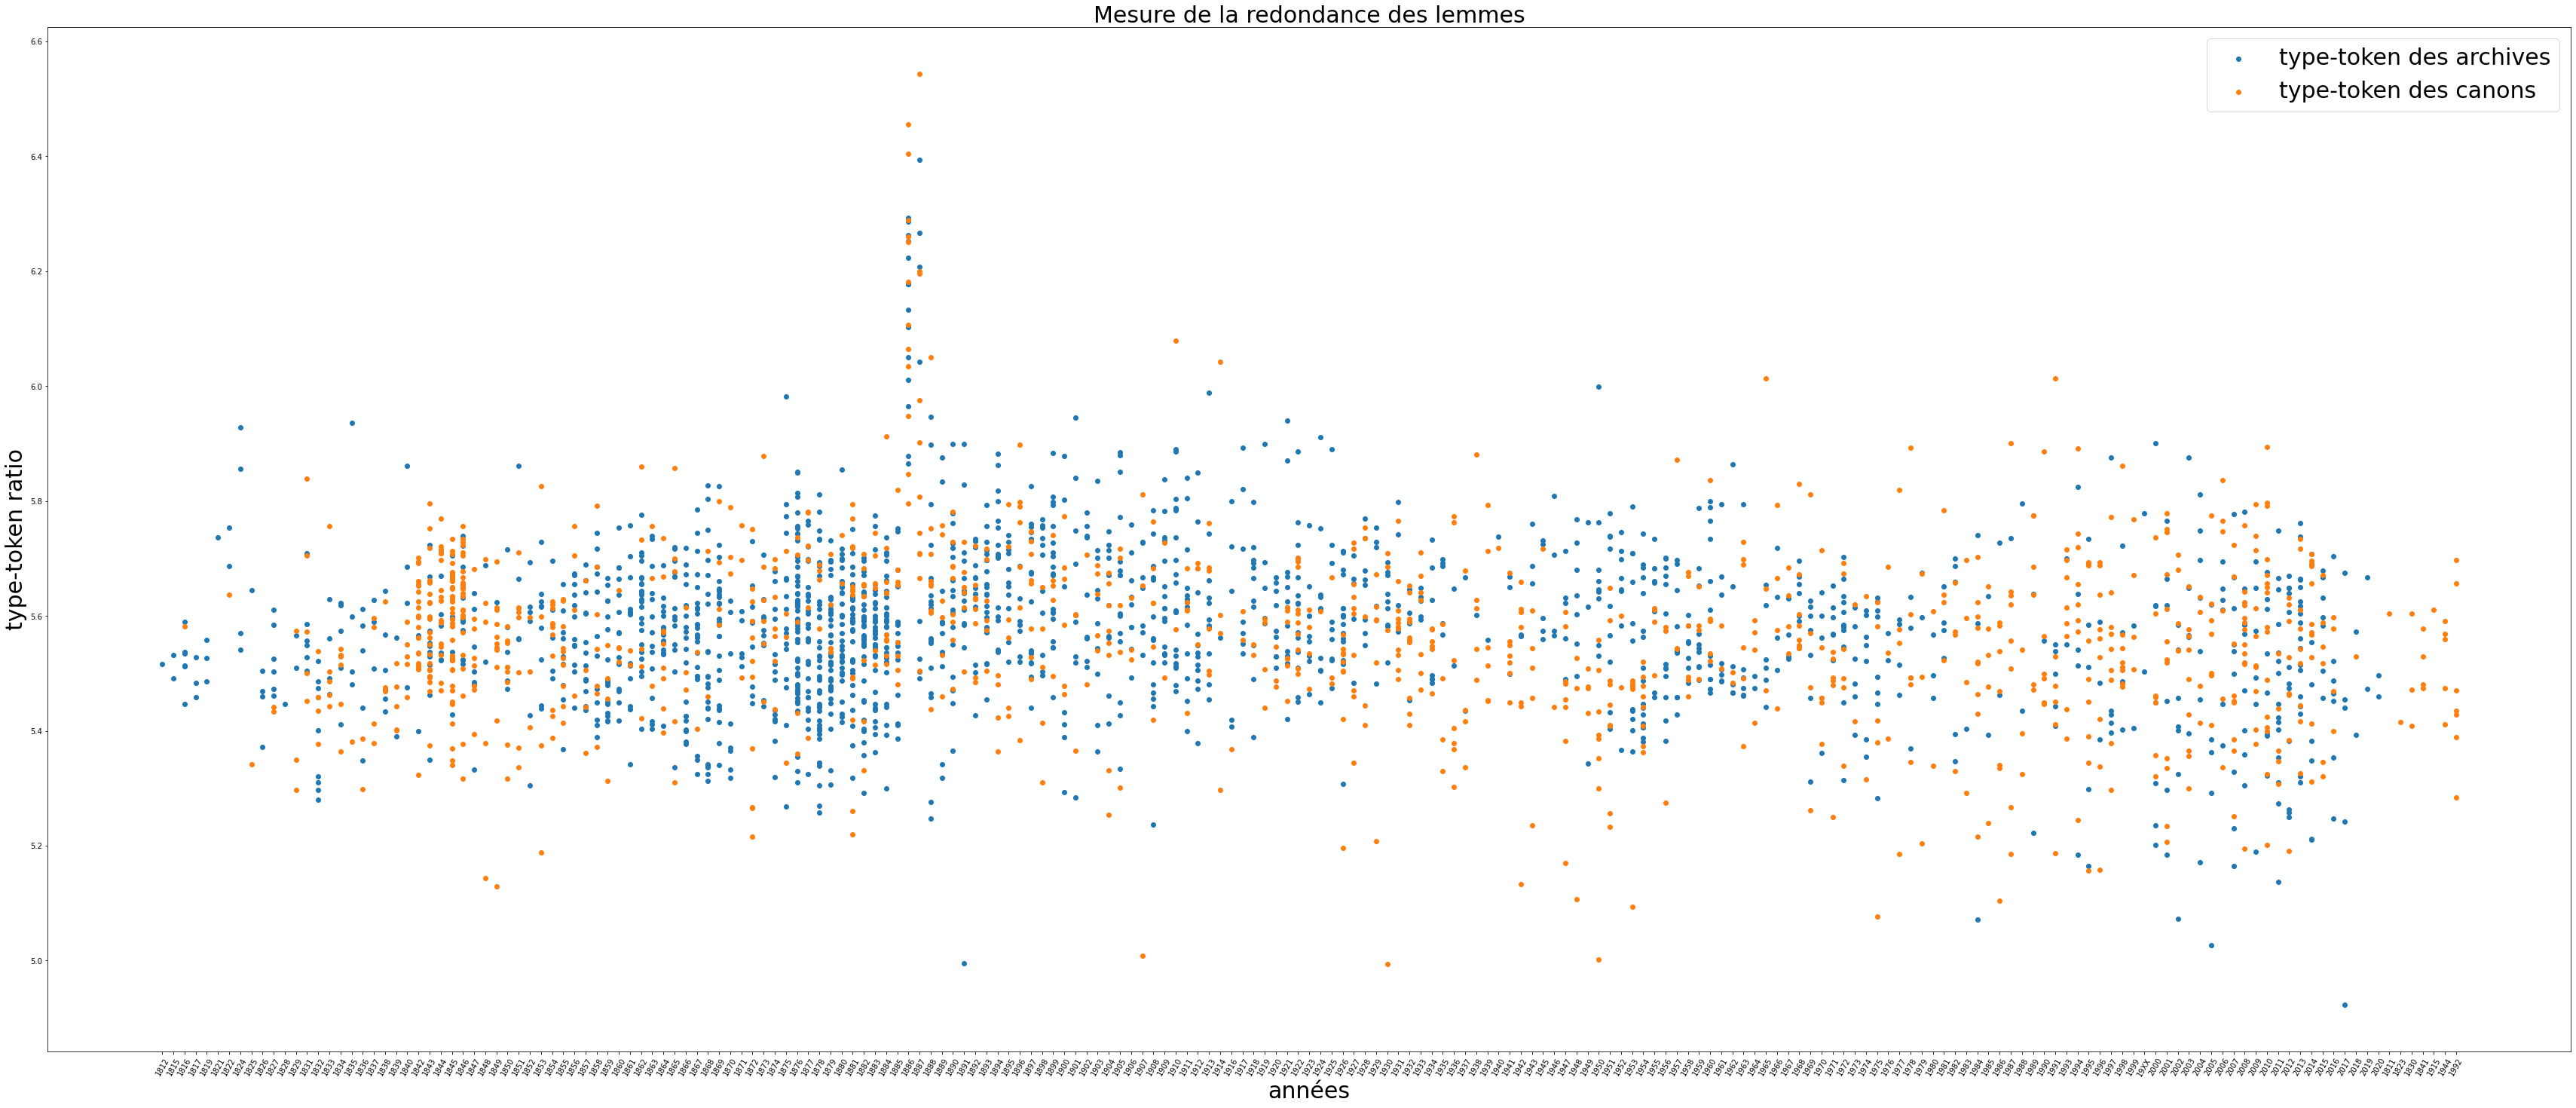

In [11]:
plt.figure(figsize=(60,25))
plt.scatter(annee_archive, type_token_archive, label = 'type-token des archives')
plt.scatter(annee_canon, type_token_canon, label = 'type-token des canons')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance des lemmes', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [49]:
sum(type_token_canon)/len(type_token_canon)

5.562782705314918

In [50]:
sum(type_token_archive)/len(type_token_archive)

5.578571463164676